<a href="https://colab.research.google.com/github/shreeshailaya/Python-/blob/master/Algorithmic_Trading_Strategy_Using_Python_SMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
from datetime import datetime 
import matplotlib.pyplot as plt 
import pandas_datareader as web

plt.style.use('fivethirtyeight')

In [108]:
df= web.DataReader('YESBANK.NS', data_source='yahoo', start='2012-01-01', end='2020-05-16')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-02,48.509998,46.099998,48.000000,46.369999,16278750.0,31.961287
2012-01-03,49.380001,46.599998,47.200001,49.180000,21337225.0,33.898132
2012-01-04,51.000000,47.610001,49.980000,48.209999,19977935.0,33.229534
2012-01-05,49.820000,47.639999,48.200001,49.570000,16636020.0,34.166943
2012-01-06,50.549999,48.500000,49.000000,49.959999,16571055.0,34.435757
...,...,...,...,...,...,...
2020-05-11,28.049999,26.700001,27.250000,27.799999,29803681.0,27.799999
2020-05-12,28.400000,26.850000,27.700001,27.950001,21395640.0,27.950001
2020-05-13,29.450001,28.100000,29.000000,28.650000,25818551.0,28.650000


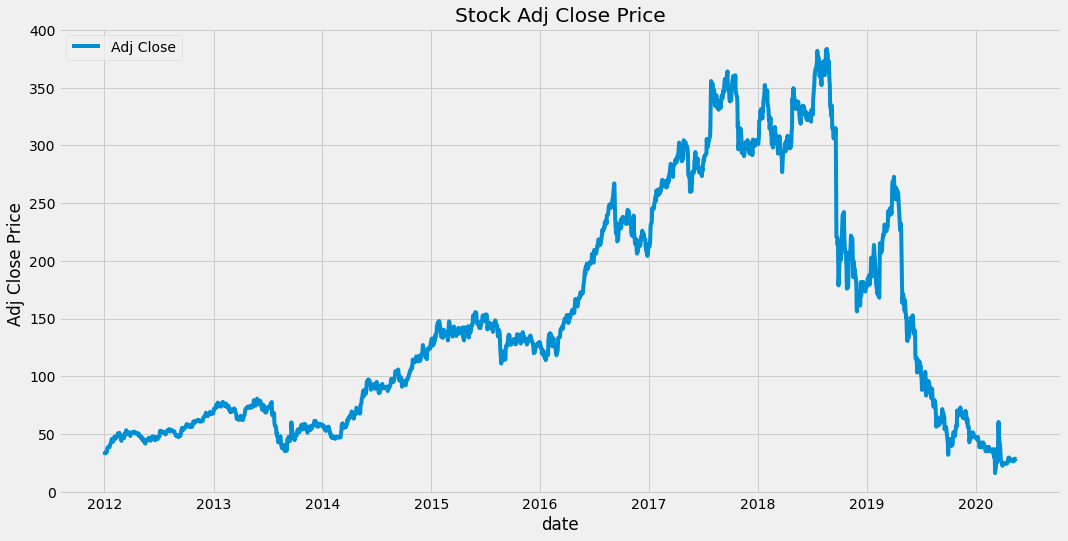

In [109]:
plt.figure(figsize=(16,8))
plt.plot(df['Adj Close'], label='Adj Close')
plt.title('Stock Adj Close Price')
plt.xlabel('date')
plt.ylabel('Adj Close Price ')
plt.legend(loc='upper left')
plt.show()

In [110]:
#create 30 days Moving Avarge 
SMA30 = pd.DataFrame()
SMA30['Adj Close price'] = df['Adj Close'].rolling(window=30).mean()
SMA30

,Adj Close price
Date,
2012-01-02,NaN
2012-01-03,NaN
2012-01-04,NaN
2012-01-05,NaN
2012-01-06,NaN
...,...
2020-05-11,26.740000
2020-05-12,26.505000
2020-05-13,26.473333


In [111]:
# SMA 200 days
SMA200 = pd.DataFrame()
SMA200['Adj Close price'] = df['Adj Close'].rolling(window=200).mean()
SMA200

,Adj Close price
Date,
2012-01-02,NaN
2012-01-03,NaN
2012-01-04,NaN
2012-01-05,NaN
2012-01-06,NaN
...,...
2020-05-11,50.99625
2020-05-12,50.66500
2020-05-13,50.34225


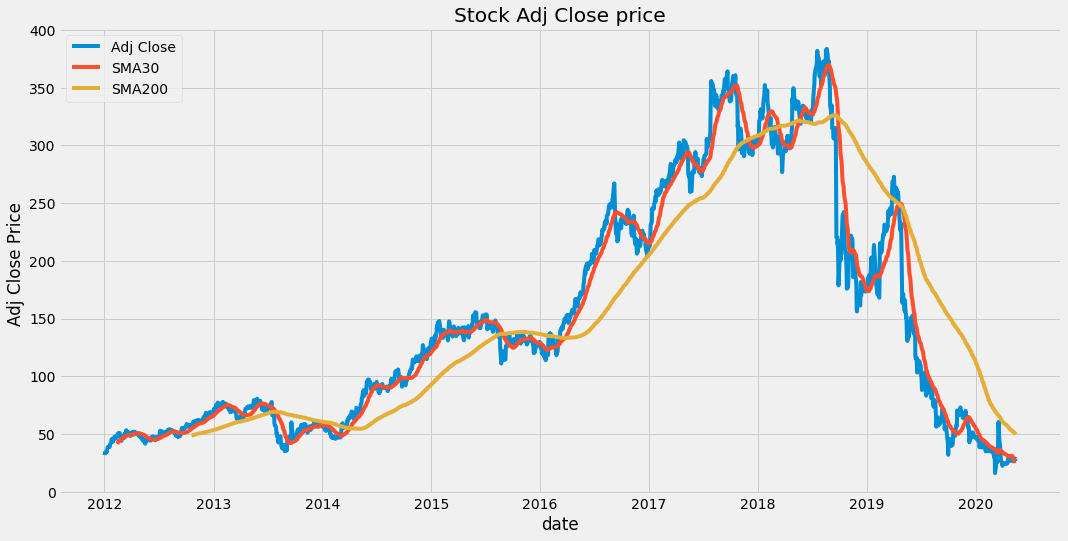

In [112]:
#plot
plt.figure(figsize=(16,8))
plt.plot(df['Adj Close'], label='Adj Close')
plt.plot(SMA30['Adj Close price'], label='SMA30')
plt.plot(SMA200['Adj Close price'], label='SMA200')
plt.title('Stock Adj Close price')
plt.xlabel('date')
plt.ylabel('Adj Close Price ')
plt.legend(loc='upper left')
plt.show()


In [113]:
data = pd.DataFrame()
data['Adj Close'] = df['Adj Close']
data['SMA30'] = SMA30['Adj Close price']
data['SMA200'] = SMA200['Adj Close price']
data

,Adj Close,SMA30,SMA200
Date,,,
2012-01-02,31.961287,NaN,NaN
2012-01-03,33.898132,NaN,NaN
2012-01-04,33.229534,NaN,NaN
2012-01-05,34.166943,NaN,NaN
2012-01-06,34.435757,NaN,NaN
...,...,...,...
2020-05-11,27.799999,26.740000,50.99625
2020-05-12,27.950001,26.505000,50.66500
2020-05-13,28.650000,26.473333,50.34225


In [0]:
#wher to buy where to sell

def buy_sell(data):
  sigPriceBuy = []
  sigPriceSell = []
  flag = -1

  for i in range (len(data)):
    if data['SMA30'][i]<data['SMA200'][i]:
      if flag != 1:
        sigPriceBuy.append(data['Adj Close'][i])
        sigPriceSell.append(np.nan)
        flag = 1
      else:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(np.nan)
    elif data['SMA30'][i]>data['SMA200'][i]:
      if flag != 0:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(data['Adj Close'][i])
        flag = 0
      else:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(np.nan)
    else:
      sigPriceBuy.append(np.nan)
      sigPriceSell.append(np.nan)

  return(sigPriceBuy, sigPriceSell)


        
        


In [0]:
#store Buy Sell Data in Variable
buy_sell = buy_sell(data)
data['Buy_Signal_Price'] = buy_sell[0]
data['Sell_Signal_Price'] = buy_sell[1]


In [116]:
data

,Adj Close,SMA30,SMA200,Buy_Signal_Price,Sell_Signal_Price
Date,,,,,
2012-01-02,31.961287,NaN,NaN,NaN,NaN
2012-01-03,33.898132,NaN,NaN,NaN,NaN
2012-01-04,33.229534,NaN,NaN,NaN,NaN
2012-01-05,34.166943,NaN,NaN,NaN,NaN
2012-01-06,34.435757,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2020-05-11,27.799999,26.740000,50.99625,NaN,NaN
2020-05-12,27.950001,26.505000,50.66500,NaN,NaN
2020-05-13,28.650000,26.473333,50.34225,NaN,NaN


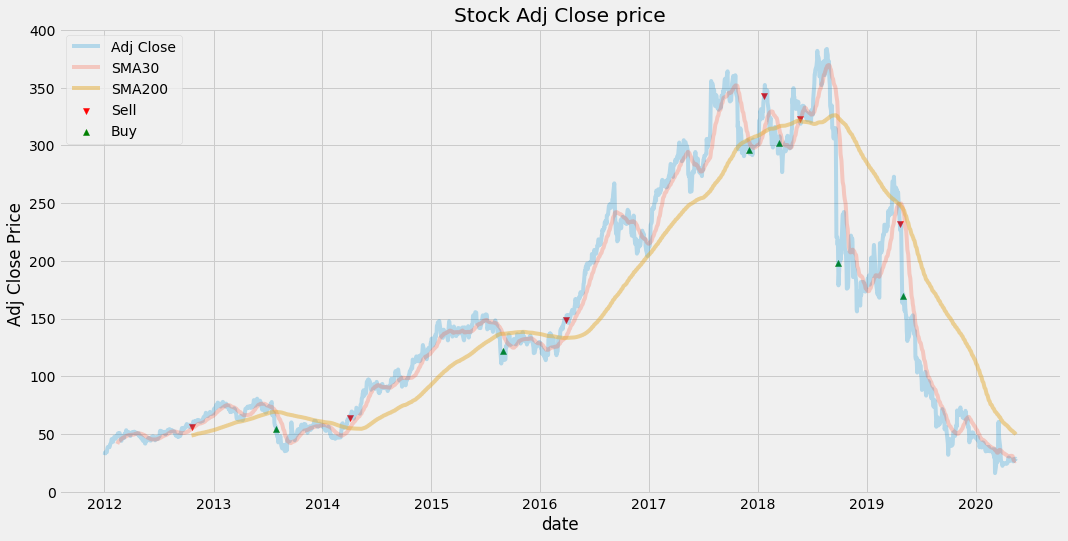

In [117]:
#plot
#plot
plt.figure(figsize=(16,8))
plt.plot(df['Adj Close'], label='Adj Close', alpha = 0.25)
plt.plot(SMA30['Adj Close price'], label='SMA30', alpha = 0.25)
plt.plot(SMA200['Adj Close price'], label='SMA200', alpha = 0.50)
plt.scatter(data.index, data['Sell_Signal_Price'], label= 'Sell', marker='v', color='red')
plt.scatter(data.index, data['Buy_Signal_Price'], label= 'Buy', marker= '^', color='green')
plt.title('Stock Adj Close price')
plt.xlabel('date')
plt.ylabel('Adj Close Price ')
plt.legend(loc='upper left')
plt.show()
